# Image Clothing Classifer using CNN

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Import the dataset
This is just a built in dataset from keras.

In [3]:
data = keras.datasets.fashion_mnist

#### Break the data into train and test sections
We might have to do this differently based on how our data is formatted.

In [5]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

#### List all possible classes
For us, this will be all the skin diseases

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Make images smaller
We can put a filter on the images here, or we can do it later.

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

#### Build a basic CNN
In the future, we can change the activation function for different layers.<br>
Documentation for keras.Sequential: https://keras.io/models/sequential/ <br>
Documentation for keras layers: https://keras.io/layers/about-keras-layers/ <br>
Documentation for built in keras activation functions: https://keras.io/activations/

In [8]:
model = keras.Sequential([ # Sequential makes all keras.layers in array into nerual network
    keras.layers.Flatten(input_shape=(28,28)),   # INPUT: Flattening data makes it so it can be passed to each neuron
    keras.layers.Dense(128, activation='relu'),  # HIDDEN: Dense means a fully connected layer
    keras.layers.Dense(10, activation='softmax') # OUTPUT: Softmax picks values for each neuron so all values add up to 1
])

#### Define the optimizer, loss function, and which metrics we want to keep track of
We can customize these in the future.
- **Optimizer**- shapes model into most accurate form possible by adjusting weights. It uses the loss function to see if it is moving in the right or wrong direction when adjusting the weights.
    - Gradient descent is one of the most popular optimizers (Gradient descent is covered in Calc 2, btw).
    - Reference this webpage to see a good description of different optimizers and other helpful machine learning concepts: https://algorithmia.com/blog/introduction-to-optimizers
    - Documentation for keras built in optimizers: https://keras.io/optimizers/
- **Loss Function**- mathmatical way of measuring how wrong your predictions are. 
    - If the learning rate is too big, our model might skip over the optimal weight for a node.
    - If it is too small, it will take too long to process the data. 
    - Documentation for keras built in loss functions: https://keras.io/losses/
    


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy'])

#### Train the model
**Epochs**- the number of times we go put the training data through the model. (In the future we will increase it. I just left it at 15 to be fast.)

In [20]:
model.fit(train_images, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2801 - accuracy: 0.8971 - categorical_accuracy: 0.1024
Epoch 2/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2685 - accuracy: 0.9010 - categorical_accuracy: 0.1024
Epoch 3/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2559 - accuracy: 0.9042 - categorical_accuracy: 0.10231s - loss: 0.2571 - accuracy: 0.9032 - catego
Epoch 4/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2471 - accuracy: 0.9082 - categorical_accuracy: 0.1014
Epoch 5/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2399 - accuracy: 0.9098 - categorical_accuracy: 0.1017
Epoch 6/15
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2288 - accuracy: 0.9147 - categorical_accuracy: 0.1017
Epoch 7/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2234 - accuracy: 0.91

#### Make predictions using test data

In [21]:
prediction = model.predict(test_images)

#### Show image with prediciton and actual label

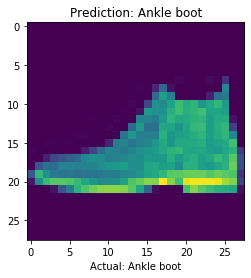

In [22]:
i = 0 # There used to be a loop here, it just looked messy to print out so many graphs
plt.grid(False)
plt.imshow(test_images[i])
plt.xlabel("Actual: " + class_names[test_labels[i]])
plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
plt.show()